In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# Utils and load data

In [4]:
def plot_history(history, title=None, validation=True):
  fig = plt.figure(figsize=(40,10))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='loss')
  if validation:
    plt.plot(history.history['val_loss'], label='val_loss')
  plt.title('Loss by epoch')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='accuracy')
  if validation:
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('Accuracy by epoch')
  plt.legend();

  if title != None:
    fig.suptitle(title, fontsize=16)
  plt.show()

In [5]:
def generate_label(X, i1, i2, i3):
  Y = np.zeros(X.shape[0])
  filter1 = (X[:,i1] < 0) & (X[:,i2] < 0) & (X[:,i3] < 0)
  filter2 = (X[:,i1] < 0) & (X[:,i2] > 0) & (X[:,i3] > 0)
  filter3 = (X[:,i1] > 0) & (X[:,i2] < 0) & (X[:,i3] > 0)
  filter4 = (X[:,i1] > 0) & (X[:,i2] > 0) & (X[:,i3] < 0)
  Y[filter1] = 1
  Y[filter2] = 1
  Y[filter3] = 1
  Y[filter4] = 1
  return Y

In [6]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

Y_short_memory = generate_label(X, -1, -2, -3)
Y_long_memory = generate_label(X, 0, 1, 2)

# Modeling

In [7]:
def perform_modeling(i_layer, x_layer, X, Y_short, Y_long, epochs, learning_rate):
  print('Short memory model')
  model1 = Model(i_layer,x_layer)
  model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  history_short = model1.fit(X, Y_short, epochs=epochs, validation_split=0.5)

  print('Long memory model')
  model2 = Model(i_layer,x_layer)
  model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
  history_long = model2.fit(X, Y_long, epochs=epochs, validation_split=0.5)

  print(model2.summary())

  plot_history(history_short, title="Short term memory")
  plot_history(history_long, title="Long term memory")

## Autoregression

Short memory model
Epoch 1/100
79/79 [==============================] - 1s 4ms/step - loss: 0.7473 - accuracy: 0.5028 - val_loss: 0.6996 - val_accuracy: 0.5048
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5104 - val_loss: 0.6943 - val_accuracy: 0.4852
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4908 - val_loss: 0.6935 - val_accuracy: 0.4976
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4944 - val_loss: 0.6953 - val_accuracy: 0.4716
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4688 - val_loss: 0.6934 - val_accuracy: 0.5048
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4864 - val_loss: 0.6947 - val_accuracy: 0.5060
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6969 - accuracy: 0.4900 - val_loss: 0.6946 - val_accuracy: 0

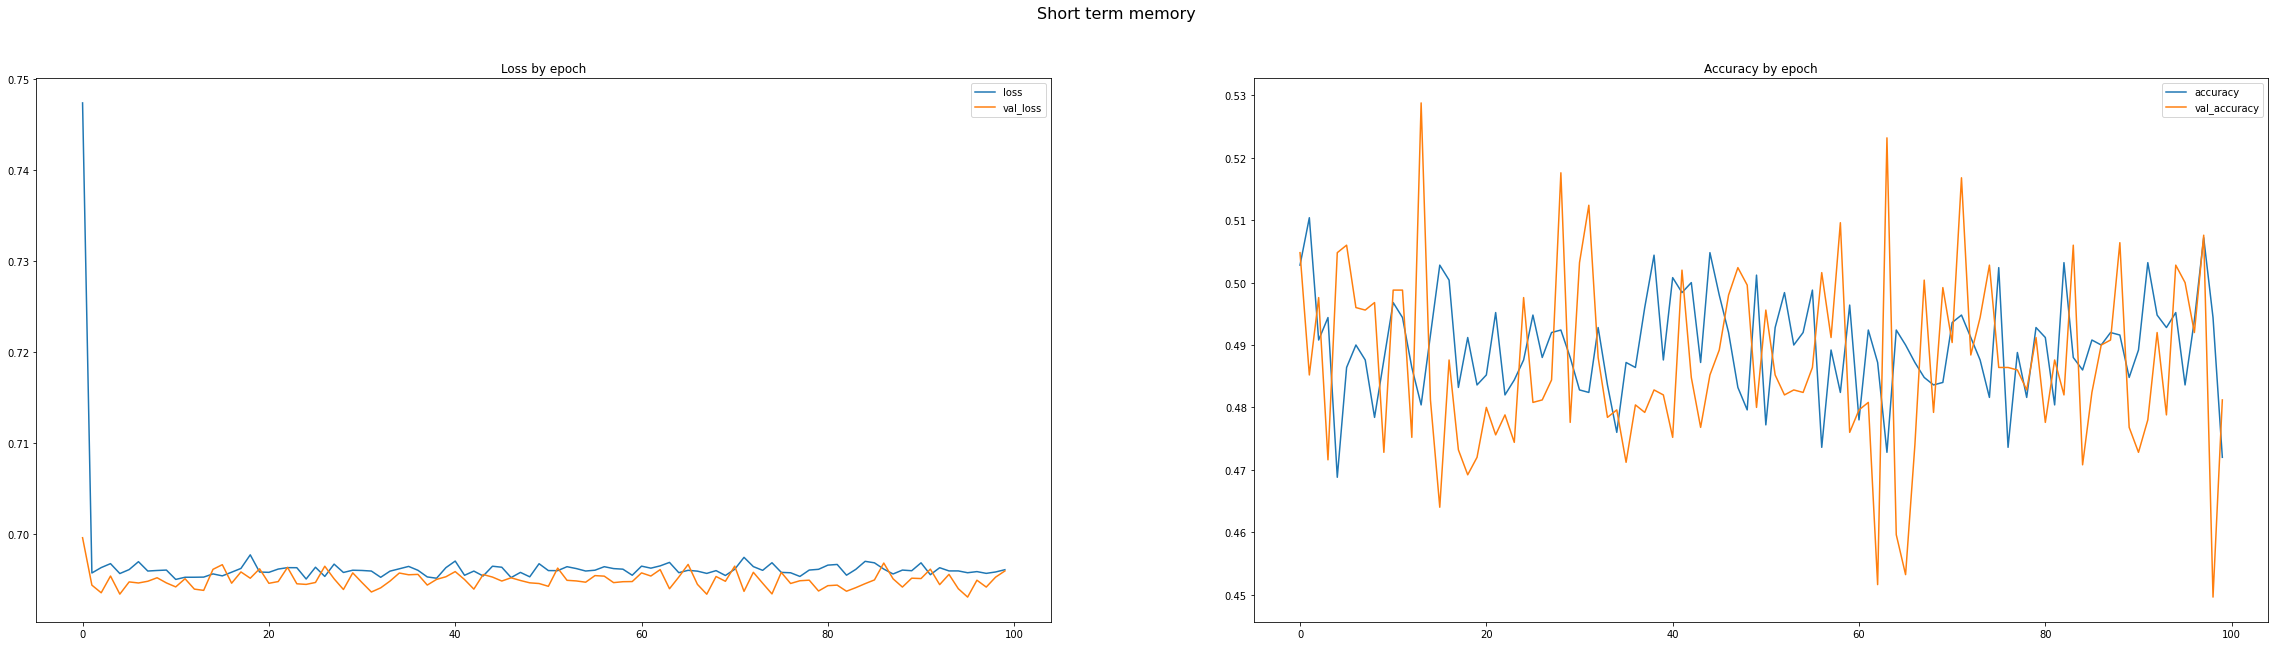

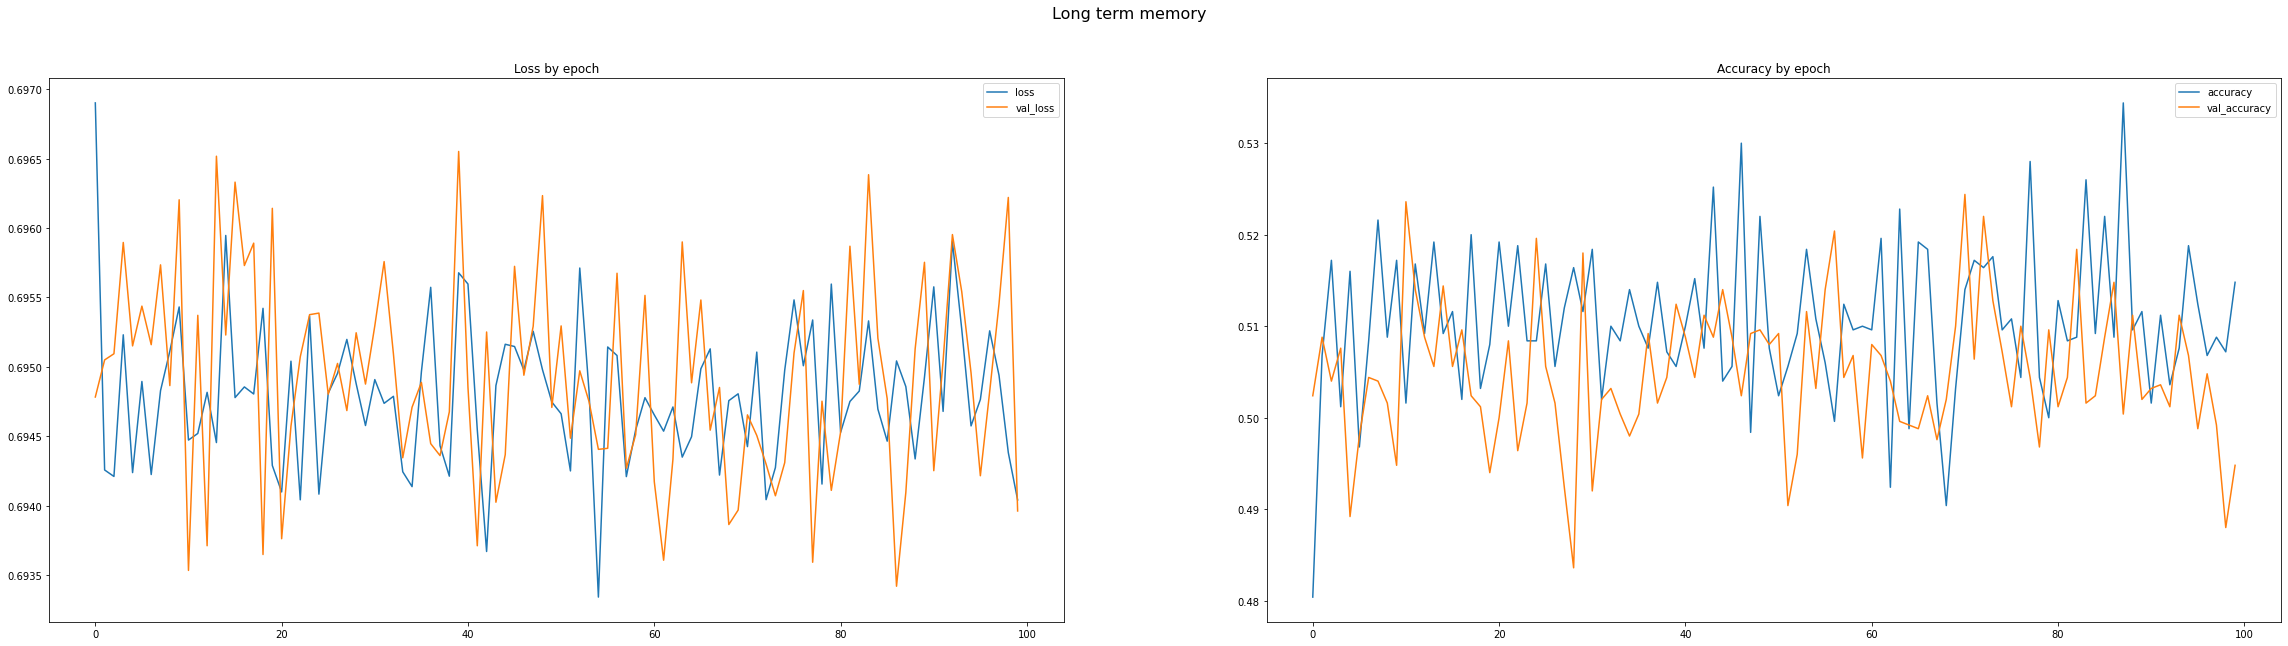

In [8]:
i = Input((T,))
x = Dense(1, activation='sigmoid')(i)

perform_modeling(i, x, X, Y_short_memory, Y_long_memory, 100, 0.01)

## Simple RNN

Short memory model
Epoch 1/200
79/79 [==============================] - 2s 6ms/step - loss: 0.6909 - accuracy: 0.5732 - val_loss: 0.6501 - val_accuracy: 0.6756
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7408 - val_loss: 0.5518 - val_accuracy: 0.7852
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.8356 - val_loss: 0.4251 - val_accuracy: 0.8556
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8984 - val_loss: 0.3372 - val_accuracy: 0.9040
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.9204 - val_loss: 0.2849 - val_accuracy: 0.9104
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.9320 - val_loss: 0.2415 - val_accuracy: 0.9372
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9416 - val_loss: 0.2153 - val_accuracy: 0

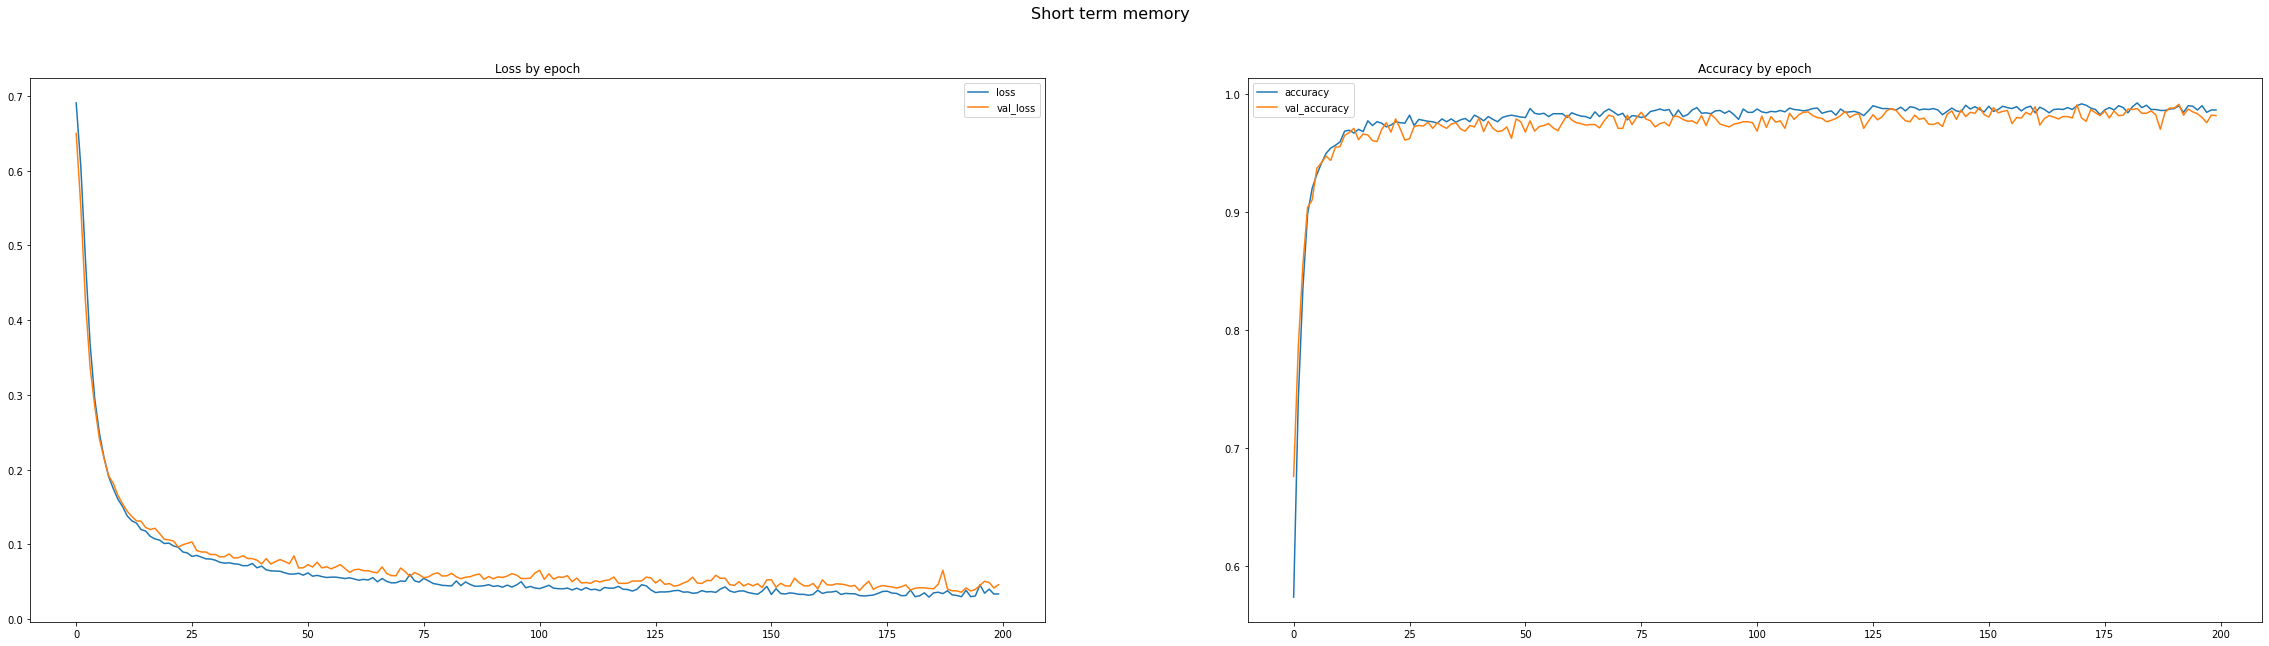

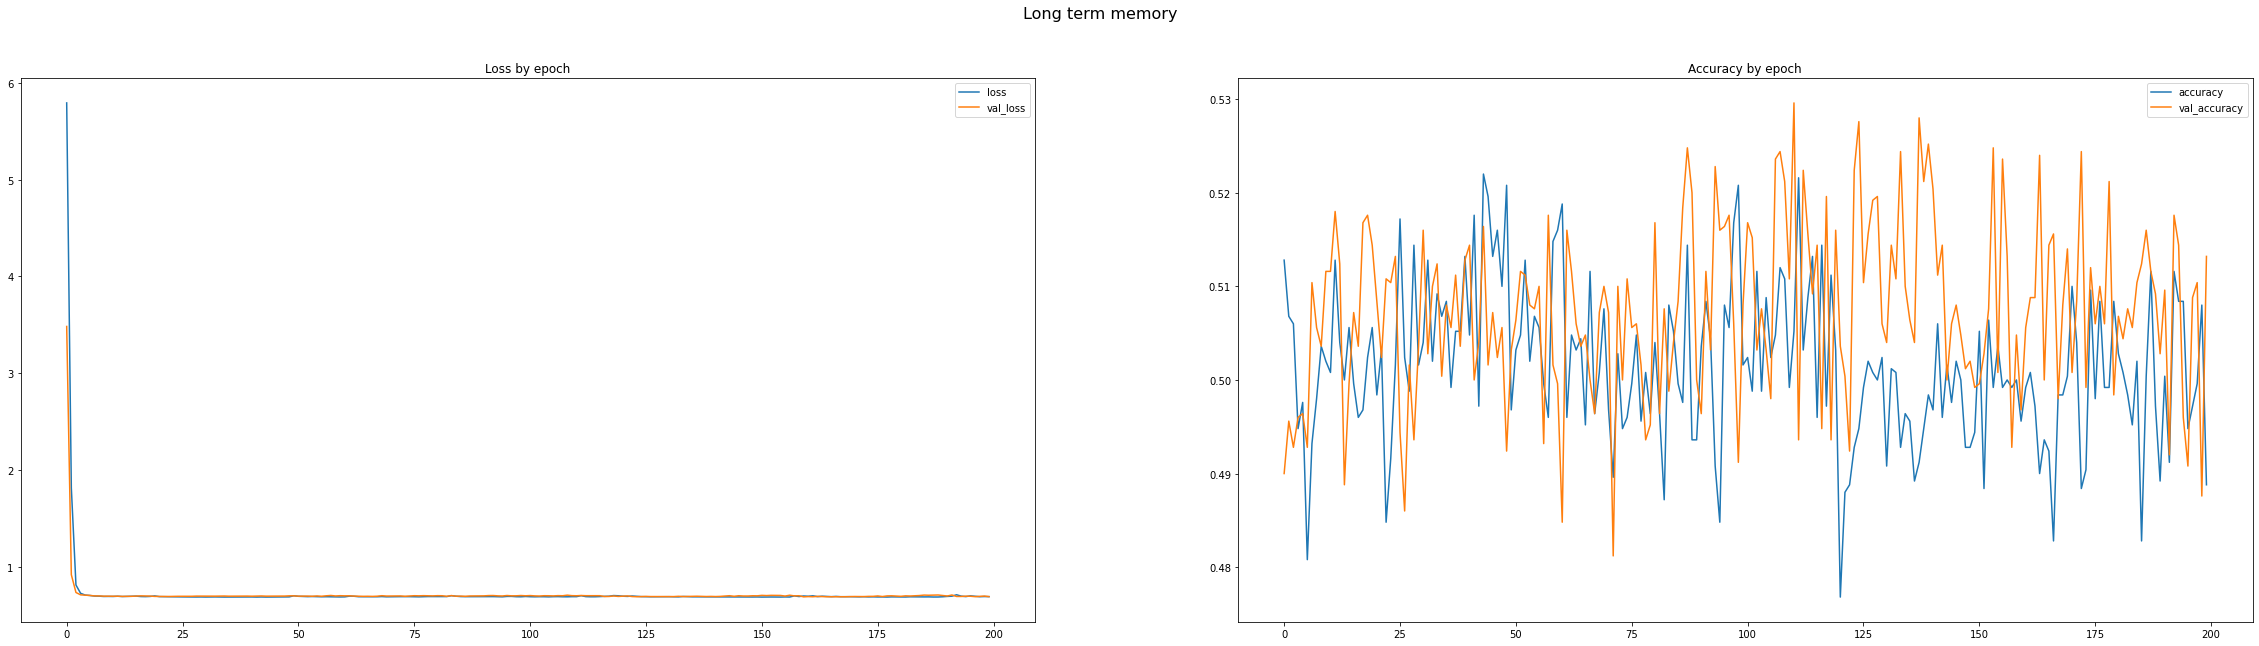

In [9]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

# LSTM

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 11ms/step - loss: 0.6947 - accuracy: 0.4960 - val_loss: 0.6928 - val_accuracy: 0.4940
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5144 - val_loss: 0.6890 - val_accuracy: 0.5476
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.5828 - val_loss: 0.6186 - val_accuracy: 0.6120
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5541 - accuracy: 0.6916 - val_loss: 0.4886 - val_accuracy: 0.7500
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4477 - accuracy: 0.7736 - val_loss: 0.4172 - val_accuracy: 0.7944
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3732 - accuracy: 0.8308 - val_loss: 0.3296 - val_accuracy: 0.8676
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.2755 - accuracy: 0.8936 - val_loss: 0.2268 - val_accuracy: 

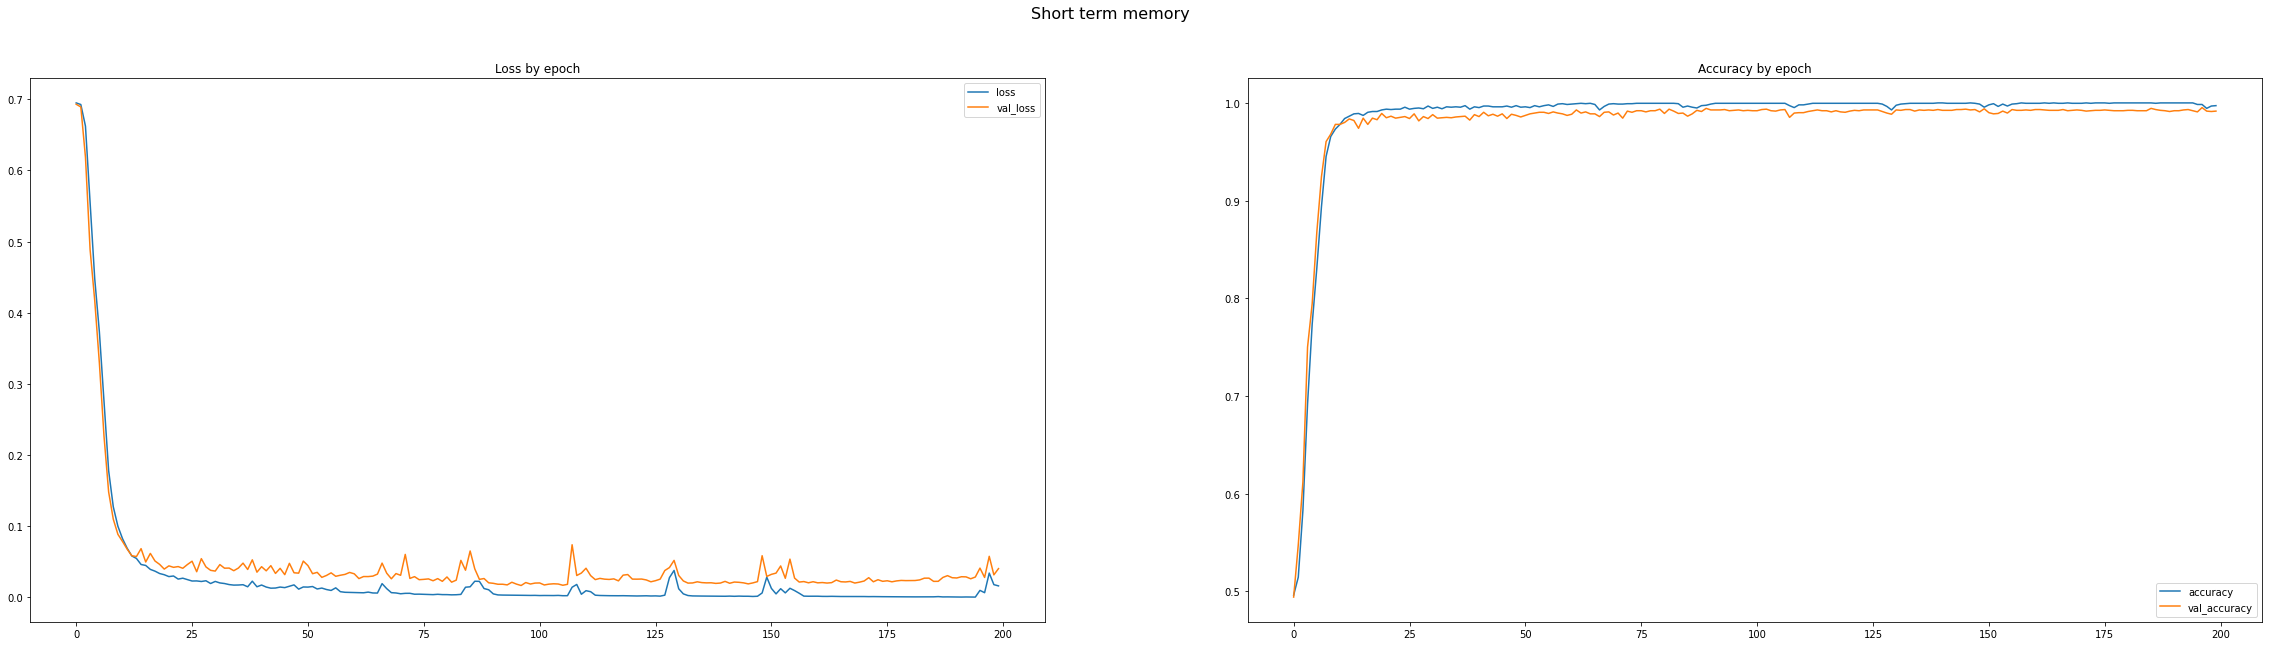

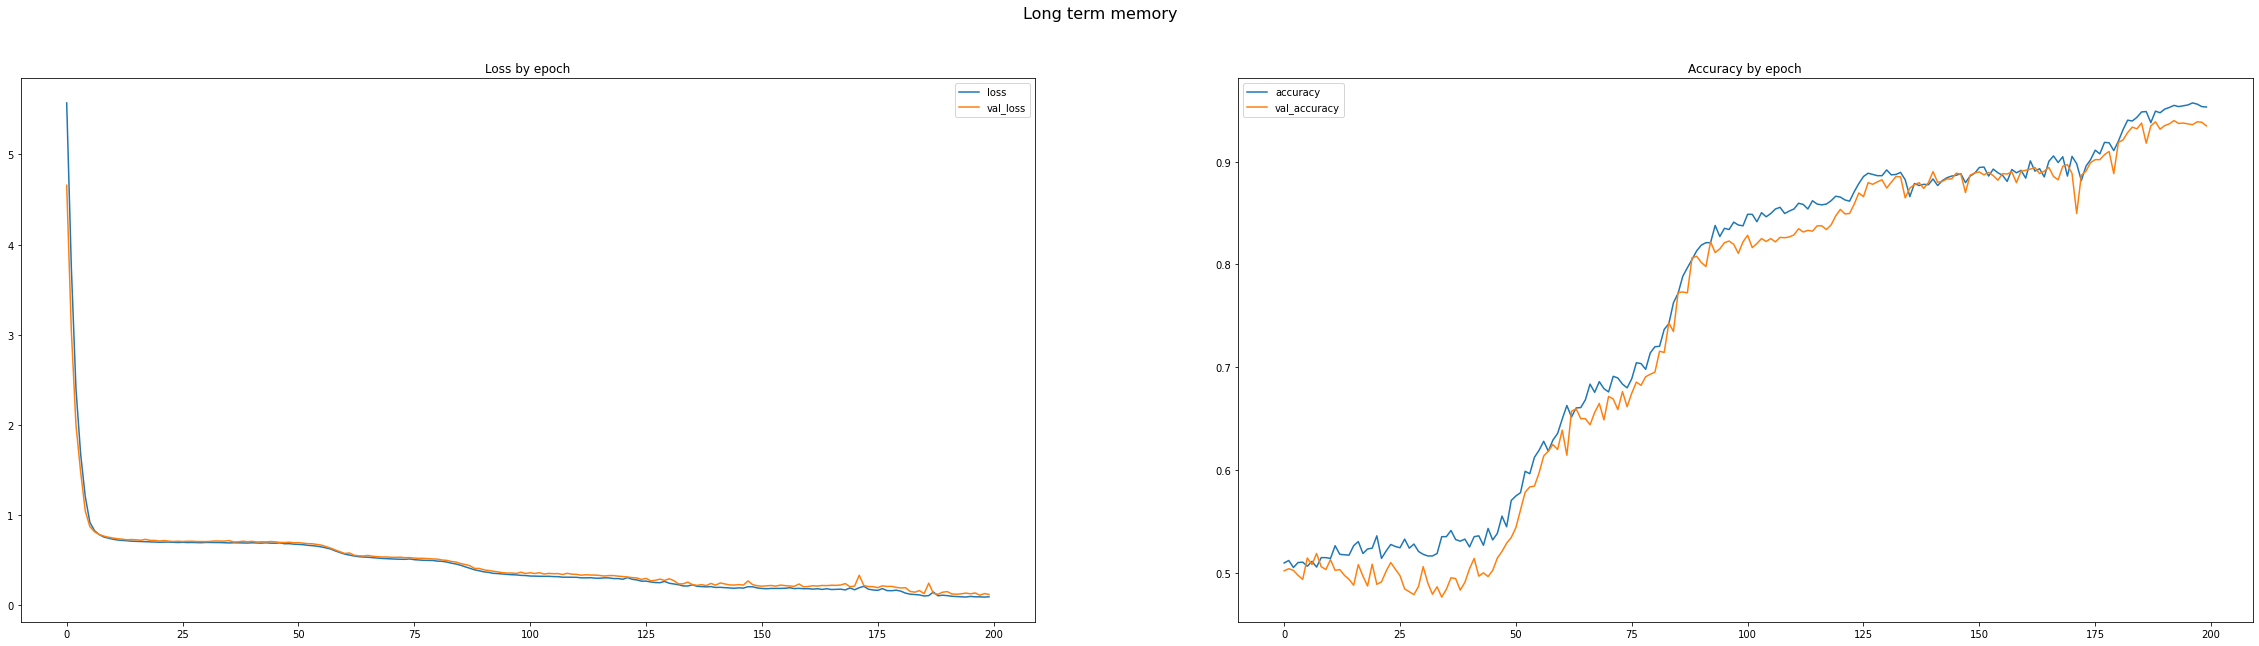

In [10]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

# GRU

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 11ms/step - loss: 0.6970 - accuracy: 0.4856 - val_loss: 0.6925 - val_accuracy: 0.5124
Epoch 2/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6799 - accuracy: 0.5532 - val_loss: 0.6574 - val_accuracy: 0.5956
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6265 - accuracy: 0.6348 - val_loss: 0.5996 - val_accuracy: 0.6624
Epoch 4/200
79/79 [==============================] - 1s 6ms/step - loss: 0.5632 - accuracy: 0.6896 - val_loss: 0.5307 - val_accuracy: 0.7176
Epoch 5/200
79/79 [==============================] - 1s 6ms/step - loss: 0.4800 - accuracy: 0.7584 - val_loss: 0.4596 - val_accuracy: 0.7928
Epoch 6/200
79/79 [==============================] - 1s 6ms/step - loss: 0.4197 - accuracy: 0.7968 - val_loss: 0.3976 - val_accuracy: 0.8184
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3718 - accuracy: 0.8296 - val_loss: 0.3502 - val_accuracy: 

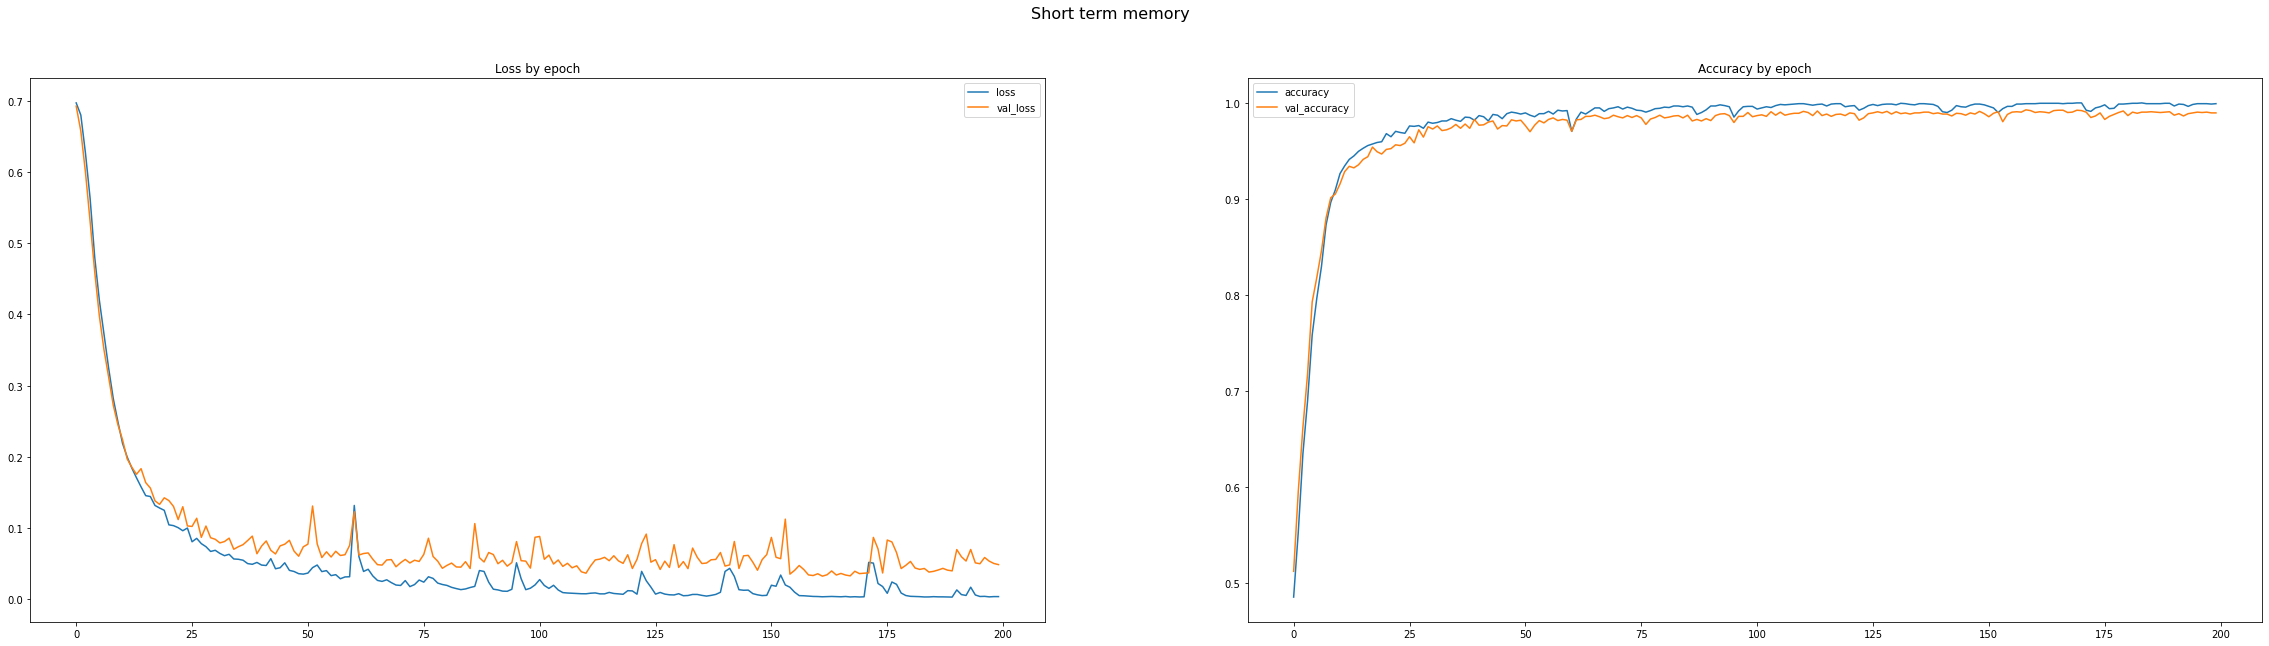

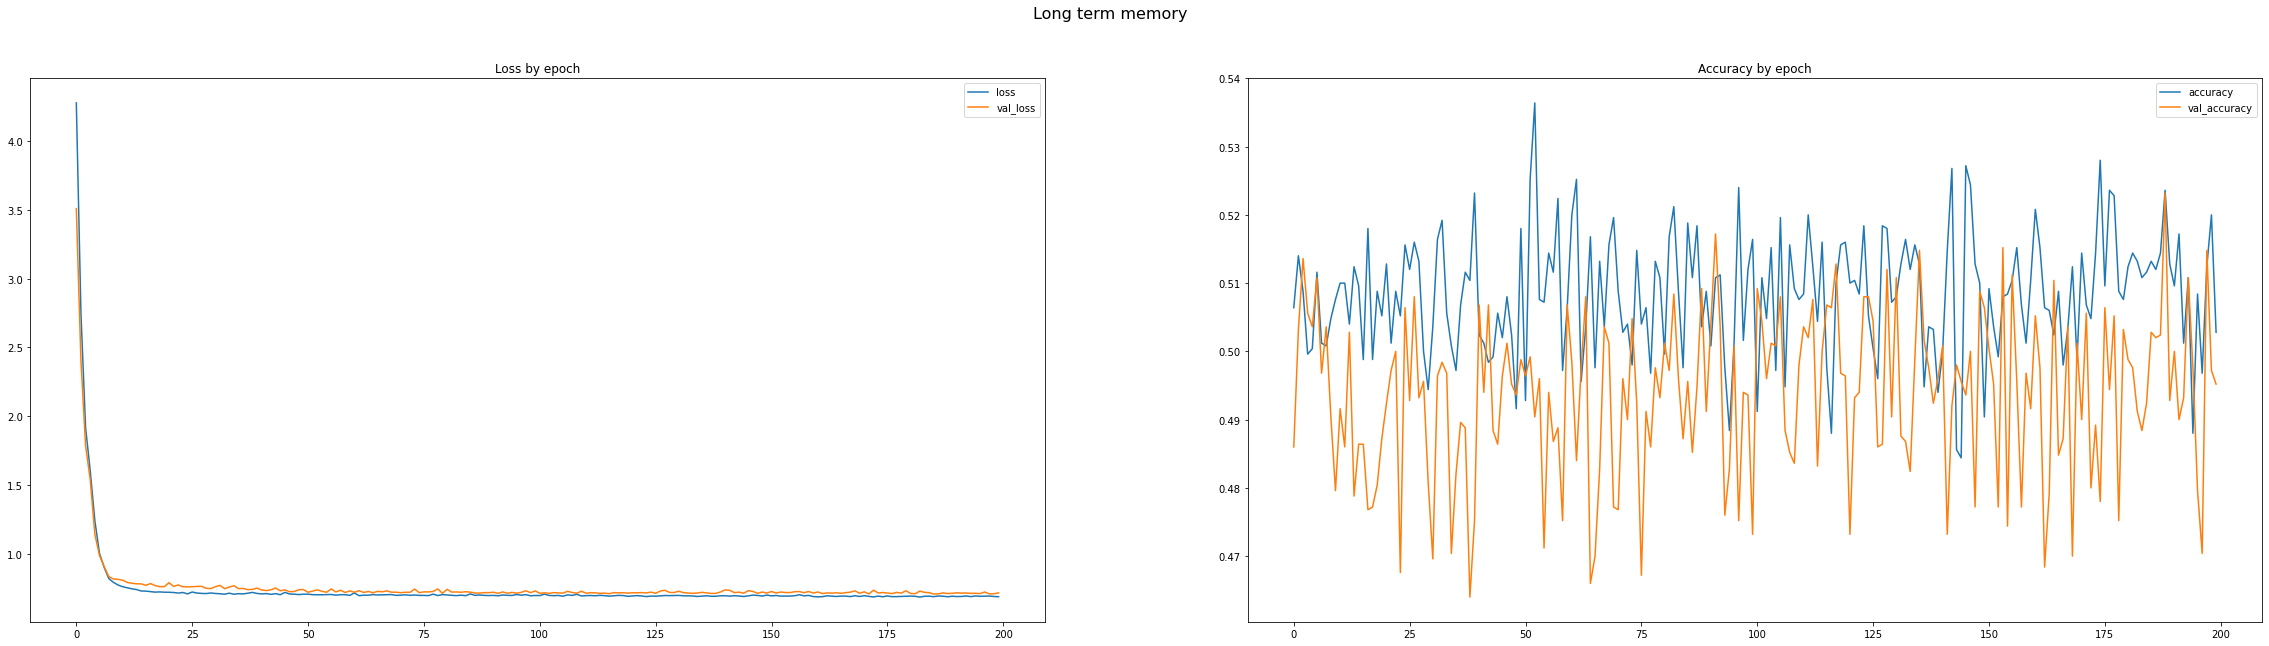

In [11]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

# LSTM with all cell states t

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 11ms/step - loss: 0.6947 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5144
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5052 - val_loss: 0.6940 - val_accuracy: 0.4896
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4940 - val_loss: 0.6934 - val_accuracy: 0.4936
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5132 - val_loss: 0.6940 - val_accuracy: 0.4916
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5256 - val_loss: 0.6926 - val_accuracy: 0.5164
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.5396 - val_loss: 0.6920 - val_accuracy: 0.5140
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5508 - val_loss: 0.6899 - val_accuracy: 

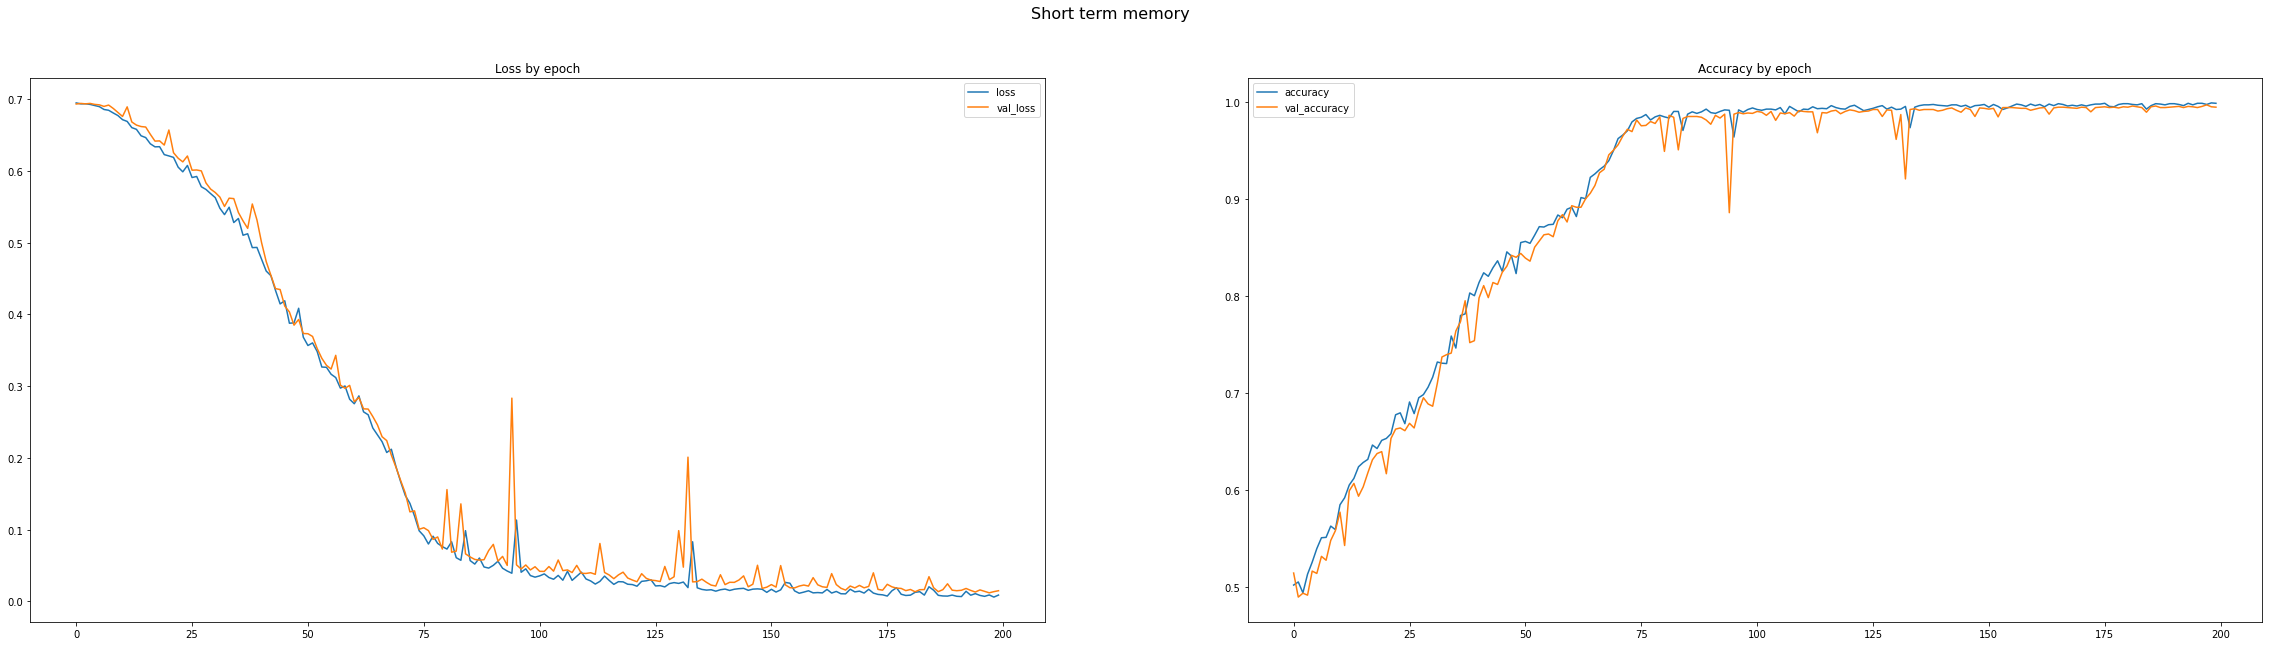

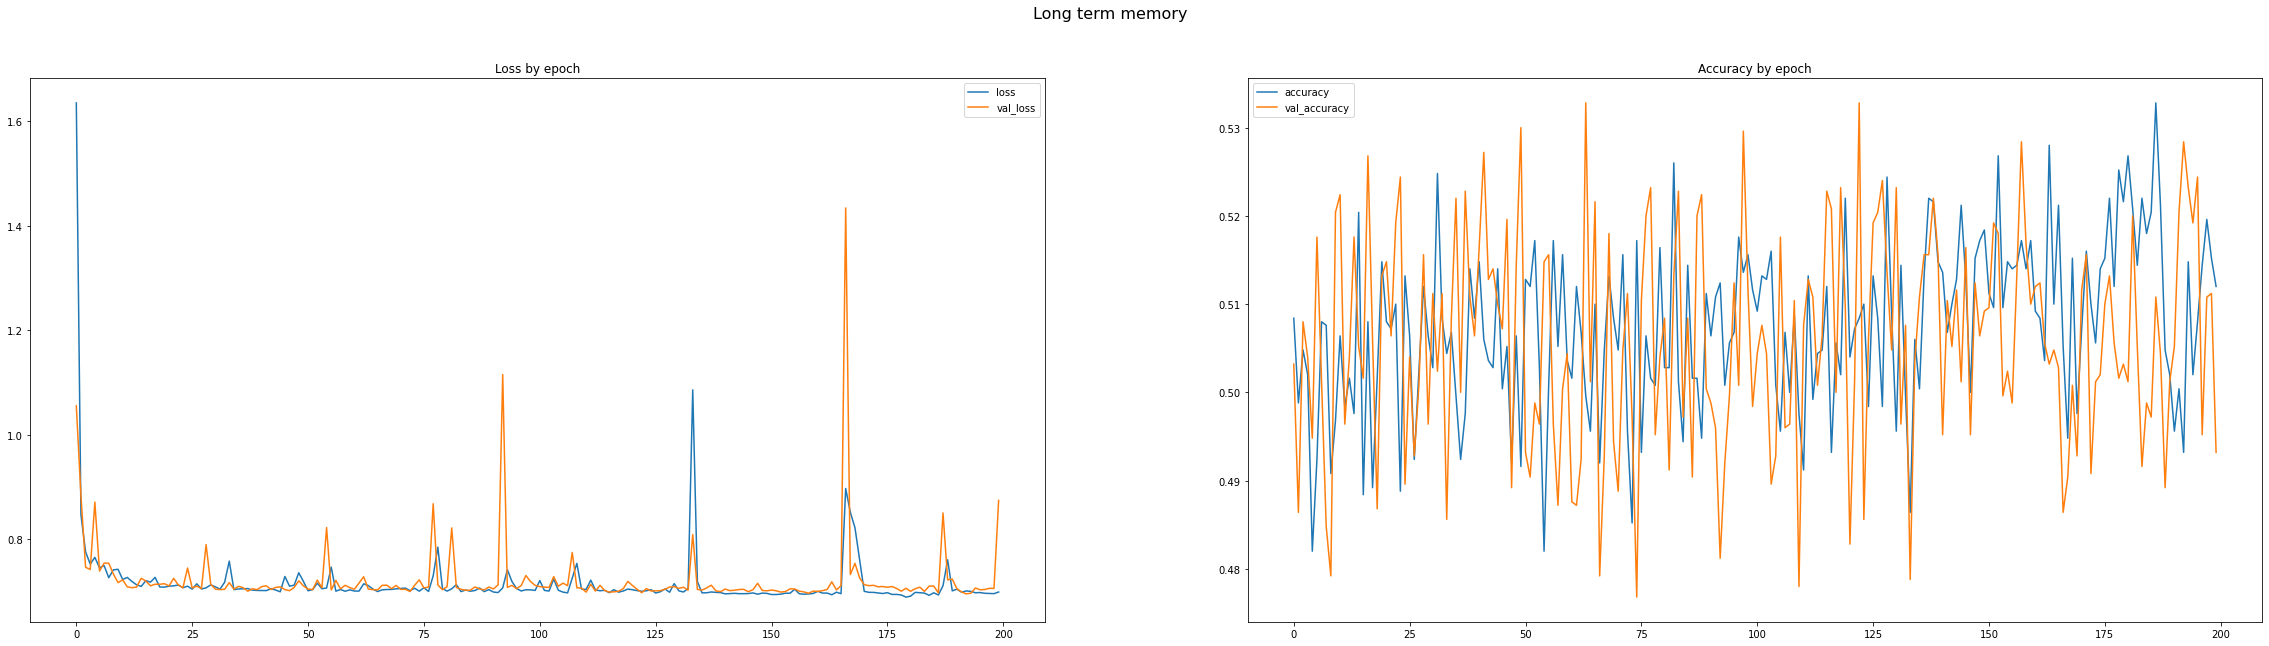

In [12]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

# Modeling of longer time series

In [13]:
# longer time series
# Start with a small T and increase it later
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)

X = np.array(X)
N = len(X)

Y_short_memory = generate_label(X, -1, -2, -3)
Y_long_memory = generate_label(X, 0, 1, 2)

## LSTM

Short memory model
Epoch 1/200
79/79 [==============================] - 3s 16ms/step - loss: 0.6936 - accuracy: 0.4868 - val_loss: 0.6918 - val_accuracy: 0.5008
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6900 - accuracy: 0.5192 - val_loss: 0.6830 - val_accuracy: 0.5388
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6199 - accuracy: 0.6820 - val_loss: 0.5079 - val_accuracy: 0.7908
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.3768 - accuracy: 0.8732 - val_loss: 0.2825 - val_accuracy: 0.9120
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.2154 - accuracy: 0.9380 - val_loss: 0.1788 - val_accuracy: 0.9508
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.1462 - accuracy: 0.9596 - val_loss: 0.1330 - val_accuracy: 0.9652
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.1090 - accuracy: 0.9744 - val_loss: 0.1061 - val_accu

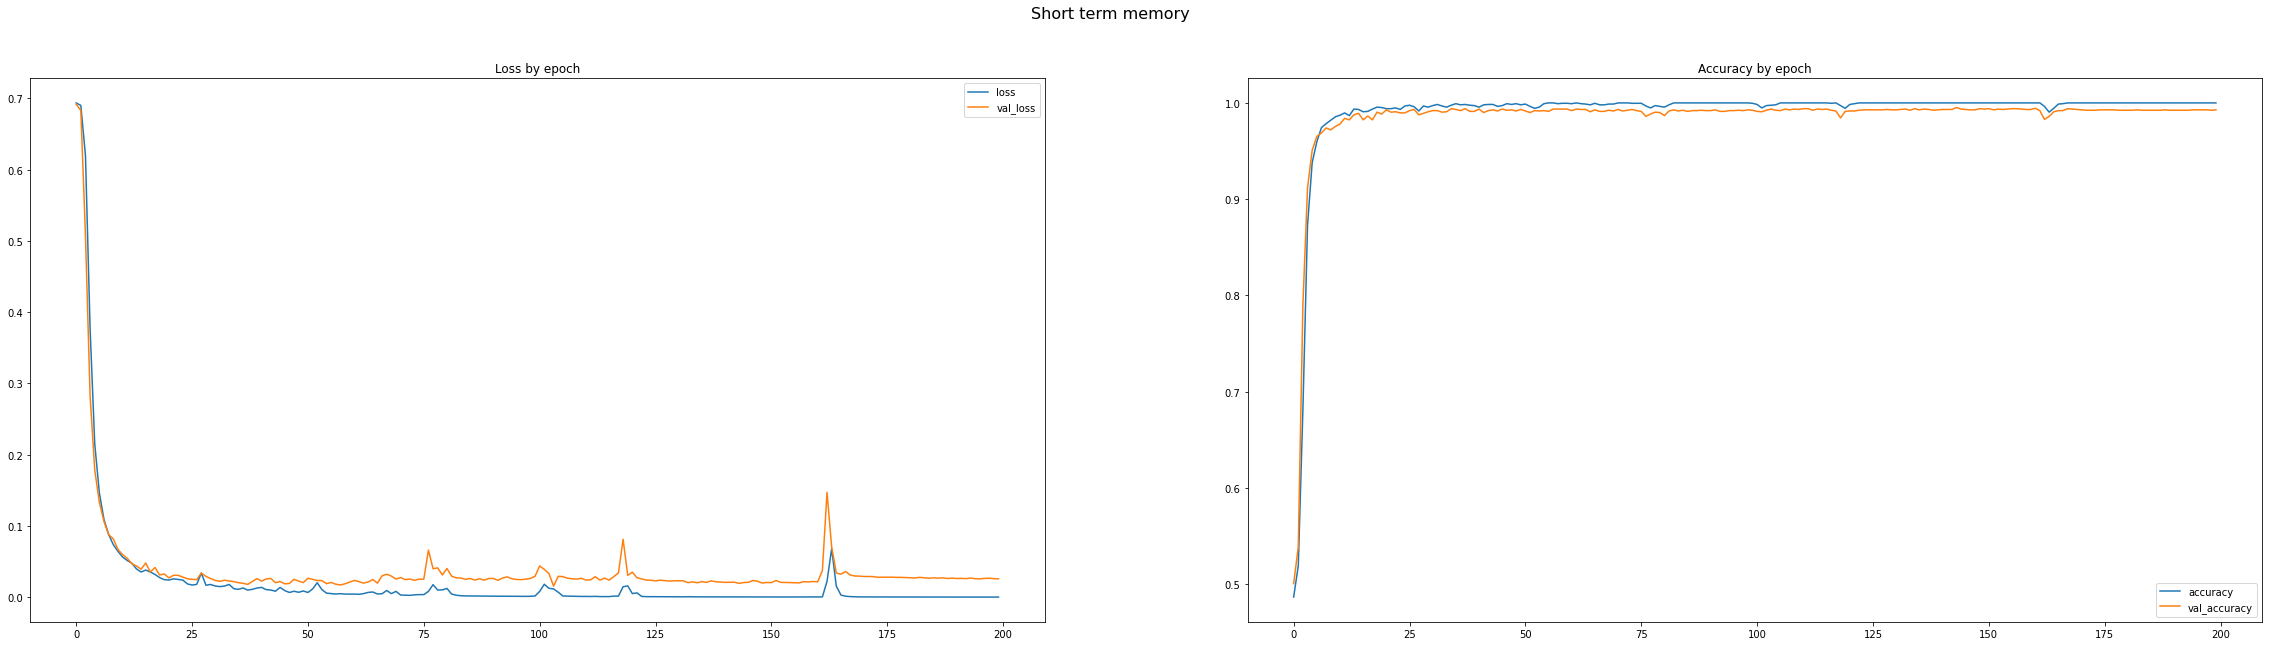

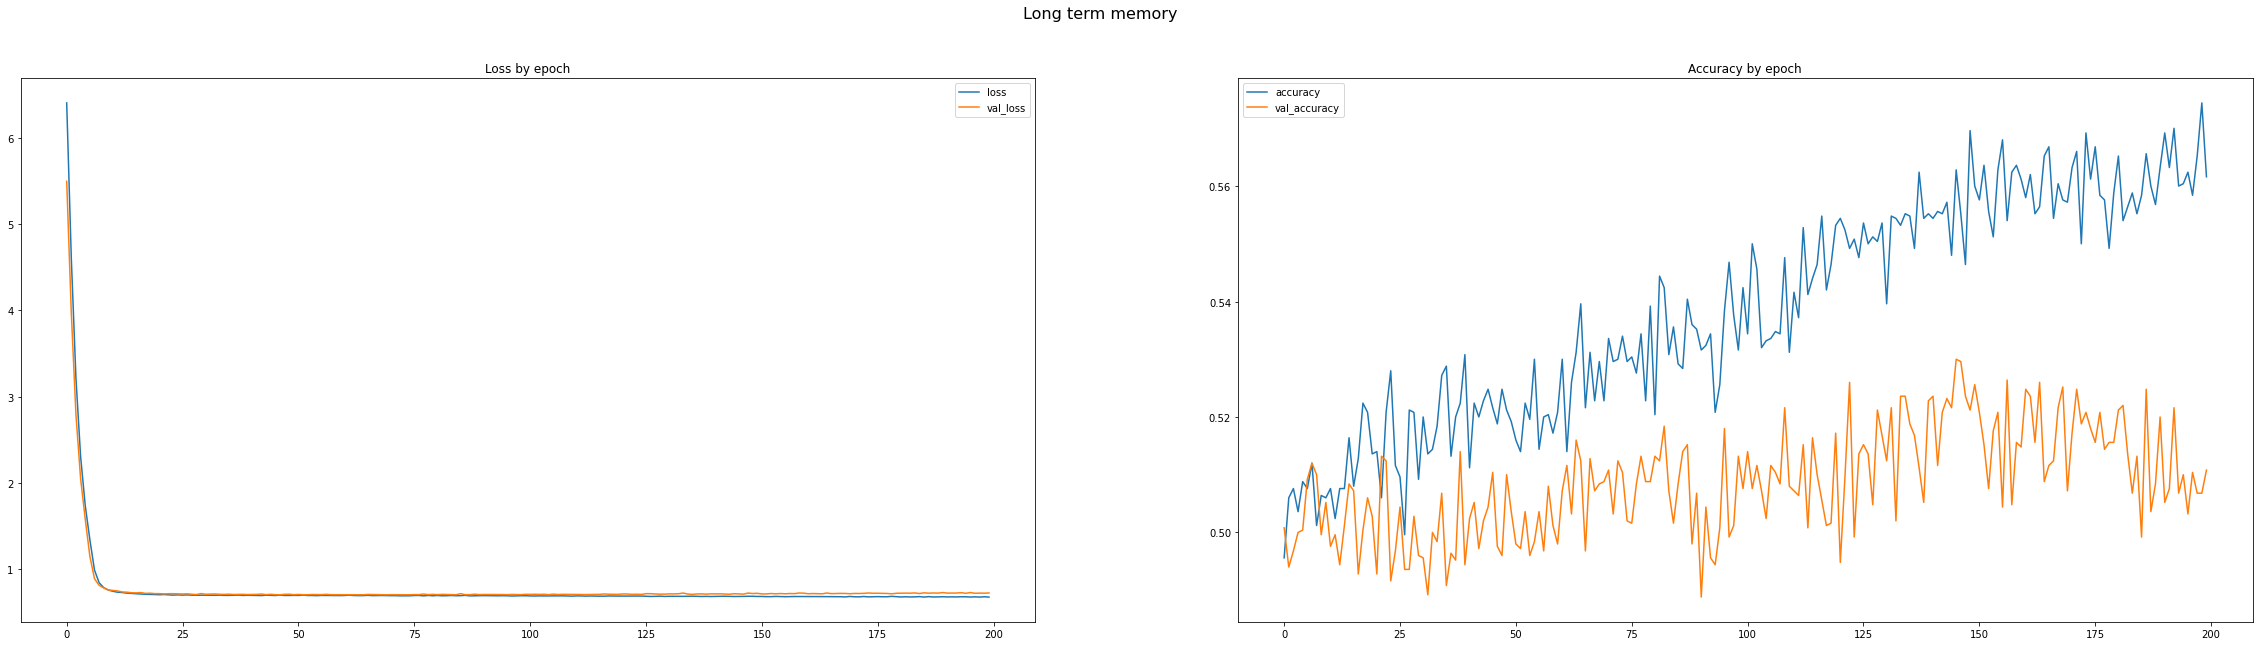

In [14]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 200, 0.01)

## LSTM with all cell states t

Short memory model
Epoch 1/400
79/79 [==============================] - 3s 16ms/step - loss: 0.6945 - accuracy: 0.4972 - val_loss: 0.6937 - val_accuracy: 0.5016
Epoch 2/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.4936 - val_loss: 0.6937 - val_accuracy: 0.5016
Epoch 3/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6937 - val_accuracy: 0.5016
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5204 - val_loss: 0.6937 - val_accuracy: 0.5016
Epoch 5/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6929 - accuracy: 0.5032 - val_loss: 0.6941 - val_accuracy: 0.5040
Epoch 6/400
79/79 [==============================] - 1s 11ms/step - loss: 0.6923 - accuracy: 0.5172 - val_loss: 0.6938 - val_accuracy: 0.5040
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6921 - accuracy: 0.5188 - val_loss: 0.6934 - val_accu

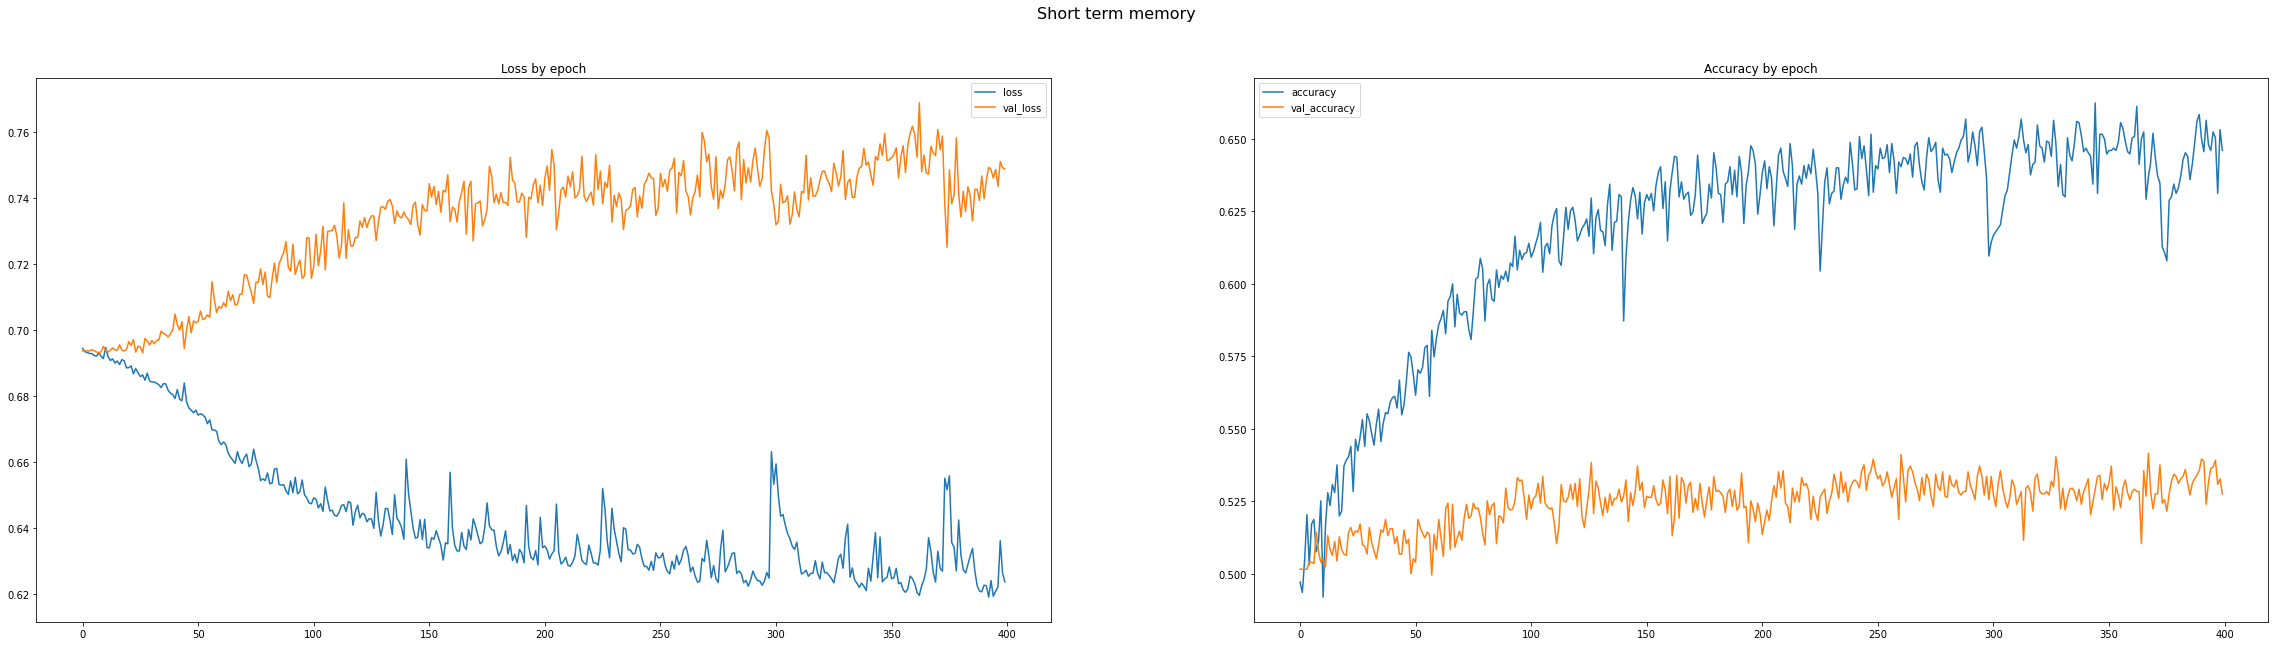

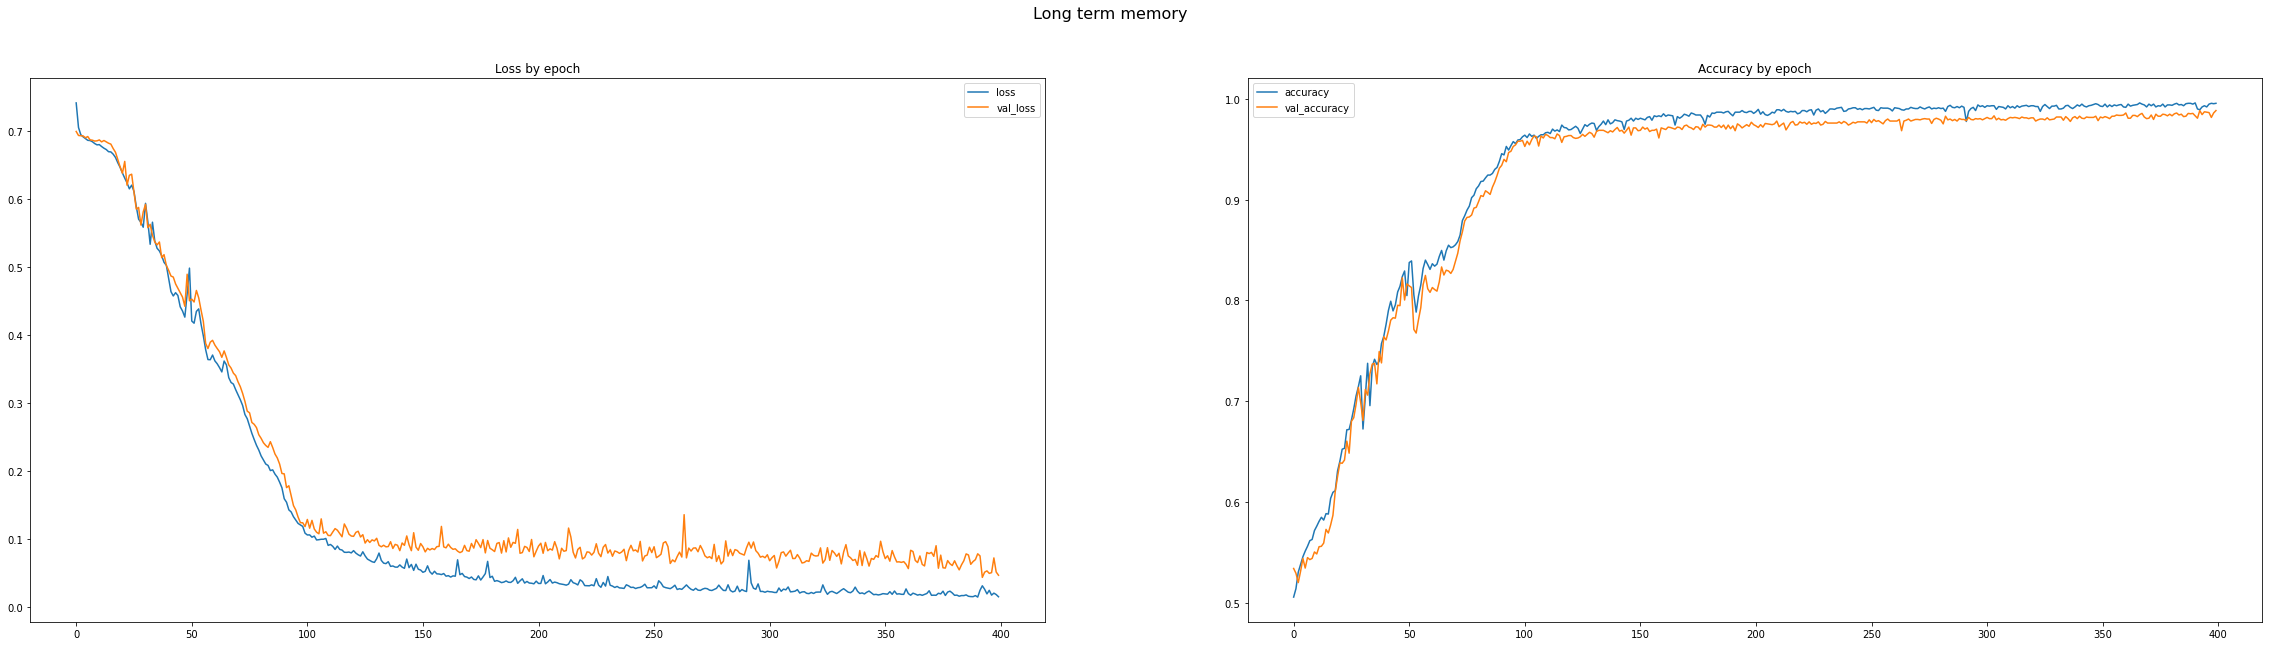

In [15]:
X2 = np.expand_dims(X, -1)

i = Input((T,1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

perform_modeling(i, x, X2, Y_short_memory, Y_long_memory, 400, 0.01)